In [ ]:
# --- Étape 1.1 : Chargement des Données et Premières Observations ---

# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np # Utile pour certaines opérations numériques et constantes comme np.nan
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer le style des graphiques pour une meilleure lisibilité dans un notebook
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6) # Définit une taille de figure par défaut

# Charger le dataset
# Le fichier s'appelle généralement 'Superstore.csv'.
# Assurez-vous qu'il est dans le même dossier que votre notebook Jupyter,
# sinon, remplacez 'Superstore.csv' par le chemin complet du fichier.
# L'encodage 'latin1' est souvent nécessaire pour ce fichier spécifique de Kaggle.
try:
    df = pd.read_csv('../data/Sample_Superstore.csv', encoding='latin1')
    print("Dataset chargé avec succès !")
except FileNotFoundError:
    print("Erreur : Le fichier 'Sample_Superstore.csv' n'a pas été trouvé.")
    print("Veuillez vous assurer que le fichier est dans le bon répertoire ou spécifier le chemin complet.")
    # Si le fichier n'est pas trouvé, le programme s'arrêtera ici.
    # Assurez-vous d'avoir téléchargé le fichier depuis Kaggle et de l'avoir placé correctement.
    exit()

# --- Premières observations ---

# Afficher les premières lignes pour avoir un aperçu
print("\n--- Aperçu des 5 premières lignes du dataset ---")
display(df.head())

# Afficher les noms des colonnes
print("\n--- Noms des colonnes ---")
print(df.columns)

# Afficher les informations générales sur le DataFrame (types de données, non-null counts, mémoire)
print("\n--- Informations sur le dataset (df.info()) ---")
df.info()

# Afficher les statistiques descriptives pour les colonnes numériques
# Cela donne une idée de la répartition des valeurs (moyenne, min, max, quartiles)
print("\n--- Statistiques descriptives pour les colonnes numériques (df.describe()) ---")
display(df.describe())

# Vérifier le nombre de valeurs uniques par colonne (utile pour les colonnes catégorielles)
print("\n--- Nombre de valeurs uniques par colonne ---")
display(df.nunique())

# Vérifier s'il y a des valeurs manquantes et combien par colonne
# Bien que df.info() le montre, cette commande donne un résumé direct
print("\n--- Nombre de valeurs manquantes par colonne (df.isnull().sum()) ---")
display(df.isnull().sum())

# Afficher la forme du dataset (nombre de lignes, nombre de colonnes)
print("\n--- Forme du dataset (nombre de lignes, nombre de colonnes) ---")
print(df.shape)

Dataset chargé avec succès !

--- Aperçu des 5 premières lignes du dataset ---


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164



--- Noms des colonnes ---
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

--- Informations sur le dataset (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           999

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000



--- Nombre de valeurs uniques par colonne ---


Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64


--- Nombre de valeurs manquantes par colonne (df.isnull().sum()) ---


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


--- Forme du dataset (nombre de lignes, nombre de colonnes) ---
(9994, 21)


Conversion des colonnes de date au format datetime...
Conversion des dates terminée.

Calcul de la marge de profit...
Calcul de la marge de profit terminé.

Aperçu du DataFrame avec les nouvelles colonnes :


,Order Date,Order Year,Order Month,Order Day of Week,Order Day Name,Sales,Profit,Profit Margin
0,2016-11-08,2016,11,1,Tuesday,261.9600,41.9136,0.1600
1,2016-11-08,2016,11,1,Tuesday,731.9400,219.5820,0.3000
2,2016-06-12,2016,6,6,Sunday,14.6200,6.8714,0.4700
3,2015-10-11,2015,10,6,Sunday,957.5775,-383.0310,-0.4000
4,2015-10-11,2015,10,6,Sunday,22.3680,2.5164,0.1125



Statistiques descriptives de la Marge de Profit :


count    9994.000000
mean        0.120314
std         0.466754
min        -2.750000
25%         0.075000
50%         0.270000
75%         0.362500
max         0.500000
Name: Profit Margin, dtype: float64


Visualisation de la distribution de la Marge de Profit :


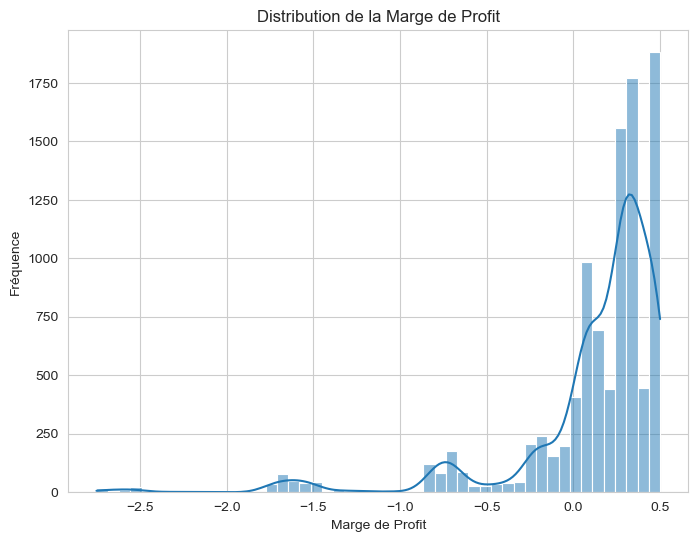

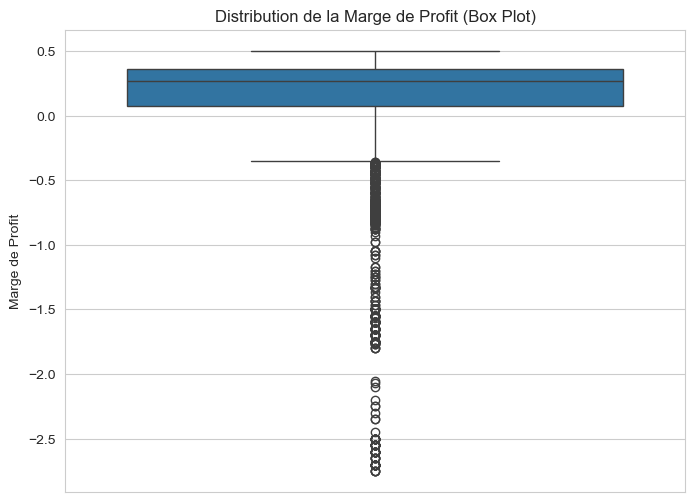

In [3]:
# --- Étape 1.2 : Nettoyage des Dates et Feature Engineering ---

# Convertir les colonnes de date au format datetime de pandas.
# Les noms typiques des colonnes de date dans ce dataset sont 'Order Date' et 'Ship Date'.
# Vérifiez avec df.info() de l'étape précédente pour vous en convaincre les gars.
print("Conversion des colonnes de date au format datetime...")
try:
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Ship Date'] = pd.to_datetime(df['Ship Date'])
    print("Conversion des dates terminée.")
except KeyError as e:
    print(f"Erreur : Colonne de date manquante - {e}. Vérifiez les noms des colonnes de date.")
    # juste pour garder les bonne habitute il faut toujours mettre des exceptions dans le code
except ValueError as e:
     print(f"Erreur lors de la conversion des dates : {e}. Vérifiez le format des dates dans le fichier.")
     # Le format par défaut (%Y-%m-%d) fonctionne souvent, sinon il faut spécifier format='...' dans pd.to_datetime().
     exit() # Arrête l'exécution en cas d'erreur critique de format

# --- Créer de nouvelles caractéristiques temporelles à partir de 'Order Date' ---
# Ces colonnes nous permettront d'analyser les tendances par année, mois, et jour de la semaine.
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
# .dt.dayofweek retourne le jour de la semaine où Lundi=0 et Dimanche=6
df['Order Day of Week'] = df['Order Date'].dt.dayofweek
# Pour rendre le jour de la semaine plus lisible, on peut aussi créer une colonne avec les noms
df['Order Day Name'] = df['Order Date'].dt.day_name()


# --- Créer la caractéristique 'Profit Margin' ---
# La marge de profit est le profit divisé par les ventes.
# C'est un indicateur clé pour comprendre la rentabilité par transaction, produit ou segment.
# Attention : si les ventes (Sales) sont de 0, la division peut résulter en Infini.
# Nous gérons ces cas en remplaçant les infinis par NaN (Not a Number) puis par 0.
print("\nCalcul de la marge de profit...")
# Calcul initial (peut générer des infinis si Sales est 0)
df['Profit Margin'] = df['Profit'] / df['Sales']

# Gérer les cas de division par zéro (où Sales = 0)
# Remplacer les infinis positifs ou négatifs résultant de la division par NaN
df['Profit Margin'] = df['Profit Margin'].replace([np.inf, -np.inf], np.nan)

# Remplacer les NaN (qui proviennent maintenant uniquement des cas Sales=0) par 0.
# Une vente de 0 rapporte un profit de 0, donc la marge est 0.
df['Profit Margin'] = df['Profit Margin'].fillna(0)
print("Calcul de la marge de profit terminé.")


# --- Vérifier les nouvelles colonnes et la transformation ---

print("\nAperçu du DataFrame avec les nouvelles colonnes :")
display(df[['Order Date', 'Order Year', 'Order Month', 'Order Day of Week', 'Order Day Name', 'Sales', 'Profit', 'Profit Margin']].head())

# Vérifier les statistiques descriptives de la nouvelle colonne 'Profit Margin'
print("\nStatistiques descriptives de la Marge de Profit :")
display(df['Profit Margin'].describe())

# Visualiser la distribution de la marge de profit pour repérer les valeurs typiques et extrêmes
print("\nVisualisation de la distribution de la Marge de Profit :")
plt.figure(figsize=(8, 6))
sns.histplot(df['Profit Margin'], bins=50, kde=True) # Histogramme avec courbe de densité
plt.title('Distribution de la Marge de Profit')
plt.xlabel('Marge de Profit')
plt.ylabel('Fréquence')
plt.show()

# Un box plot peut aussi aider à voir les outliers de marge de profit
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Profit Margin'])
plt.title('Distribution de la Marge de Profit (Box Plot)')
plt.ylabel('Marge de Profit')
plt.show()

Exploration des relations entre variables clés...

Visualisation : Performance par Catégorie de Produit


C:\Users\user\AppData\Local\Temp\ipykernel_12940\3157992635.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=df, x='Category', y='Sales', palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_12940\3157992635.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df, x='Category', y='Profit', palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_12940\3157992635.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], data=df, x='Category', y='Profit Margin', palette='viridis')


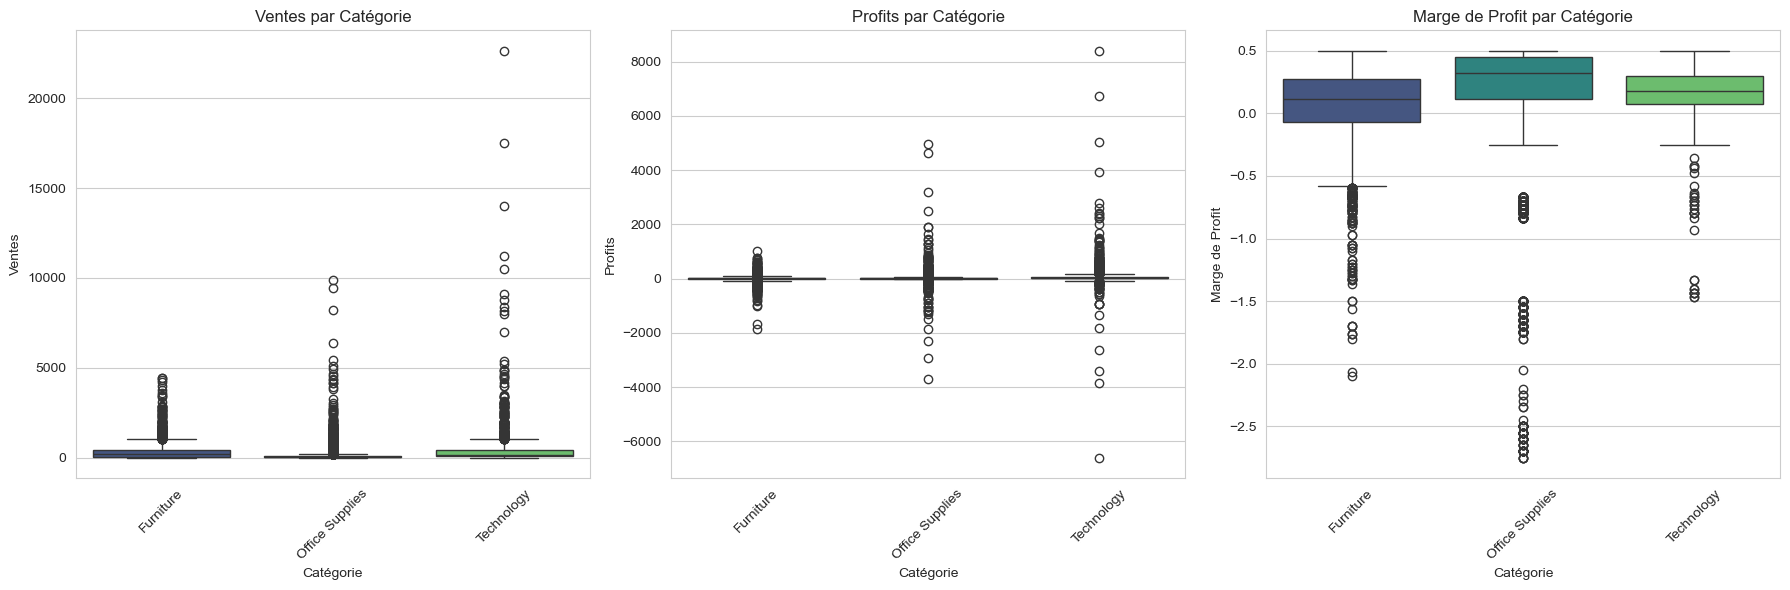

In [5]:
# --- Étape 1.3 : Exploration des Relations entre Variables ---

print("Exploration des relations entre variables clés...")

# --- Relation Quali-Quanti : Performance (Ventes, Profits, Marge) par Catégories de Produit ---
# Les box plots sont excellents pour comparer la distribution d'une variable quantitative
# entre différentes catégories. Ils montrent la médiane, les quartiles et les outliers.

print("\nVisualisation : Performance par Catégorie de Produit")
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # Créer 3 sous-graphiques côte à côte

sns.boxplot(ax=axes[0], data=df, x='Category', y='Sales', palette='viridis')
axes[0].set_title('Ventes par Catégorie')
axes[0].set_xlabel('Catégorie')
axes[0].set_ylabel('Ventes')
axes[0].tick_params(axis='x', rotation=45) # Rotation des labels si nécessaire

sns.boxplot(ax=axes[1], data=df, x='Category', y='Profit', palette='viridis')
axes[1].set_title('Profits par Catégorie')
axes[1].set_xlabel('Catégorie')
axes[1].set_ylabel('Profits')
axes[1].tick_params(axis='x', rotation=45) # Rotation des labels

sns.boxplot(ax=axes[2], data=df, x='Category', y='Profit Margin', palette='viridis')
axes[2].set_title('Marge de Profit par Catégorie')
axes[2].set_xlabel('Catégorie')
axes[2].set_ylabel('Marge de Profit')
axes[2].tick_params(axis='x', rotation=45) # Rotation des labels

plt.tight_layout() # Ajuste les sous-graphiques pour éviter qu'ils ne se chevauchent
plt.show()


Visualisation : Profits par Sous-Catégorie


C:\Users\user\AppData\Local\Temp\ipykernel_13440\1996666805.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sub-Category', y='Profit', palette='viridis')


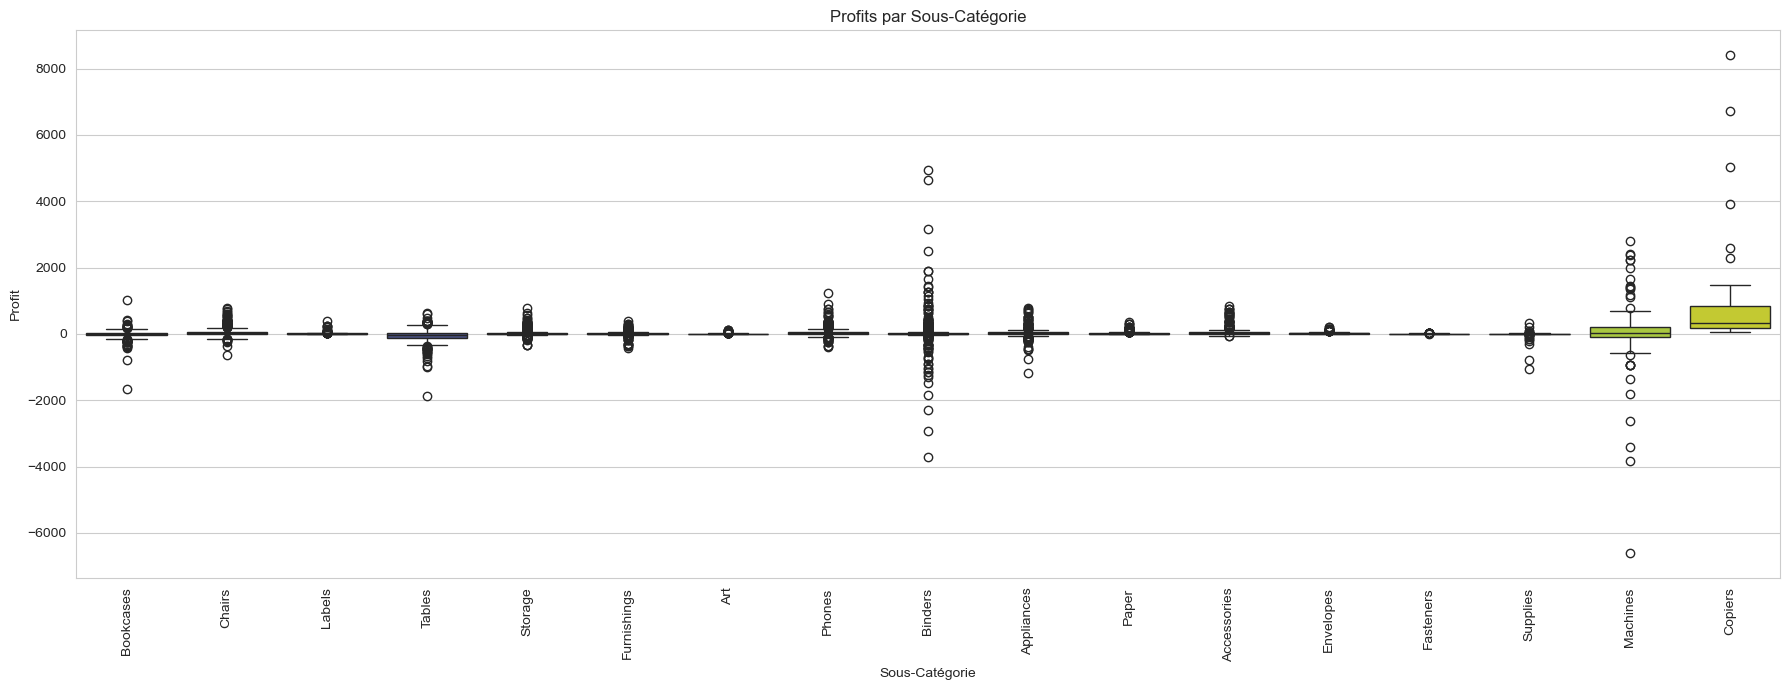


Visualisation : Marge de Profit par Sous-Catégorie


C:\Users\user\AppData\Local\Temp\ipykernel_13440\1996666805.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sub-Category', y='Profit Margin', palette='viridis')


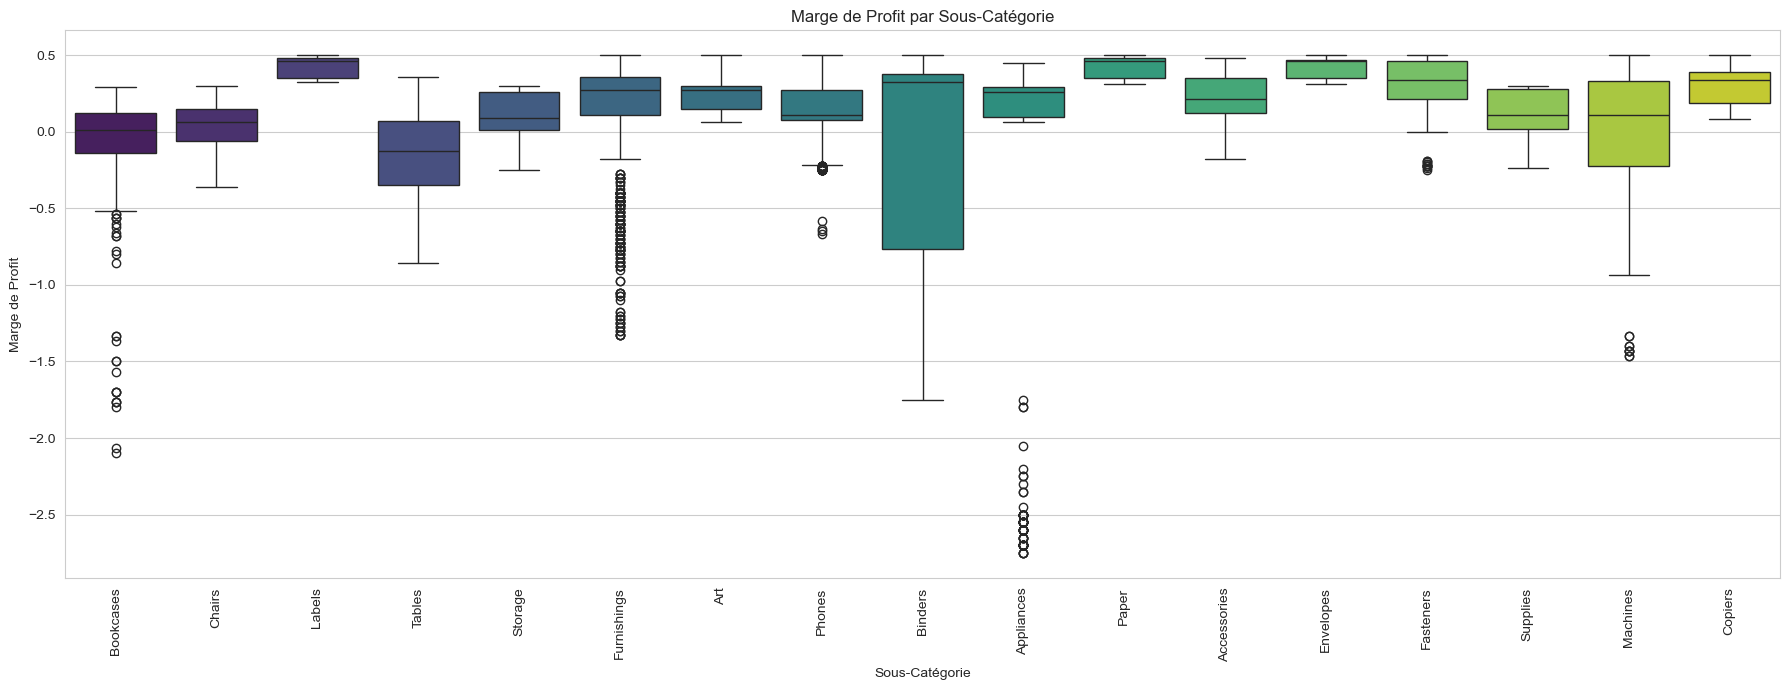

In [7]:
# --- Relation Quali-Quanti : Performance par Sous-Catégories (Concentrons-nous sur le Profit/Marge) ---
# Il y a beaucoup de sous-catégories. Visualiser toutes peut être illisible.
# On peut visualiser les sous-catégories les plus/moins profitables, ou les plus volumineuses.
# Visualisons les profits par sous-catégorie.

print("\nVisualisation : Profits par Sous-Catégorie")
plt.figure(figsize=(18, 7))
sns.boxplot(data=df, x='Sub-Category', y='Profit', palette='viridis')
plt.title('Profits par Sous-Catégorie')
plt.xlabel('Sous-Catégorie')
plt.ylabel('Profit')
plt.xticks(rotation=90, ha='center') # Rotation verticale pour plus de lisibilité
plt.tight_layout()
plt.show()

print("\nVisualisation : Marge de Profit par Sous-Catégorie")
plt.figure(figsize=(18, 7))
sns.boxplot(data=df, x='Sub-Category', y='Profit Margin', palette='viridis')
plt.title('Marge de Profit par Sous-Catégorie')
plt.xlabel('Sous-Catégorie')
plt.ylabel('Marge de Profit')
plt.xticks(rotation=90, ha='center') # Rotation verticale
plt.tight_layout()
plt.show()


Visualisation : Performance par Région


C:\Users\user\AppData\Local\Temp\ipykernel_12940\3593733674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=df, x='Region', y='Sales', palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_12940\3593733674.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df, x='Region', y='Profit', palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_12940\3593733674.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], data=df, x='Region', y='Profit Margin', palette='viridis')


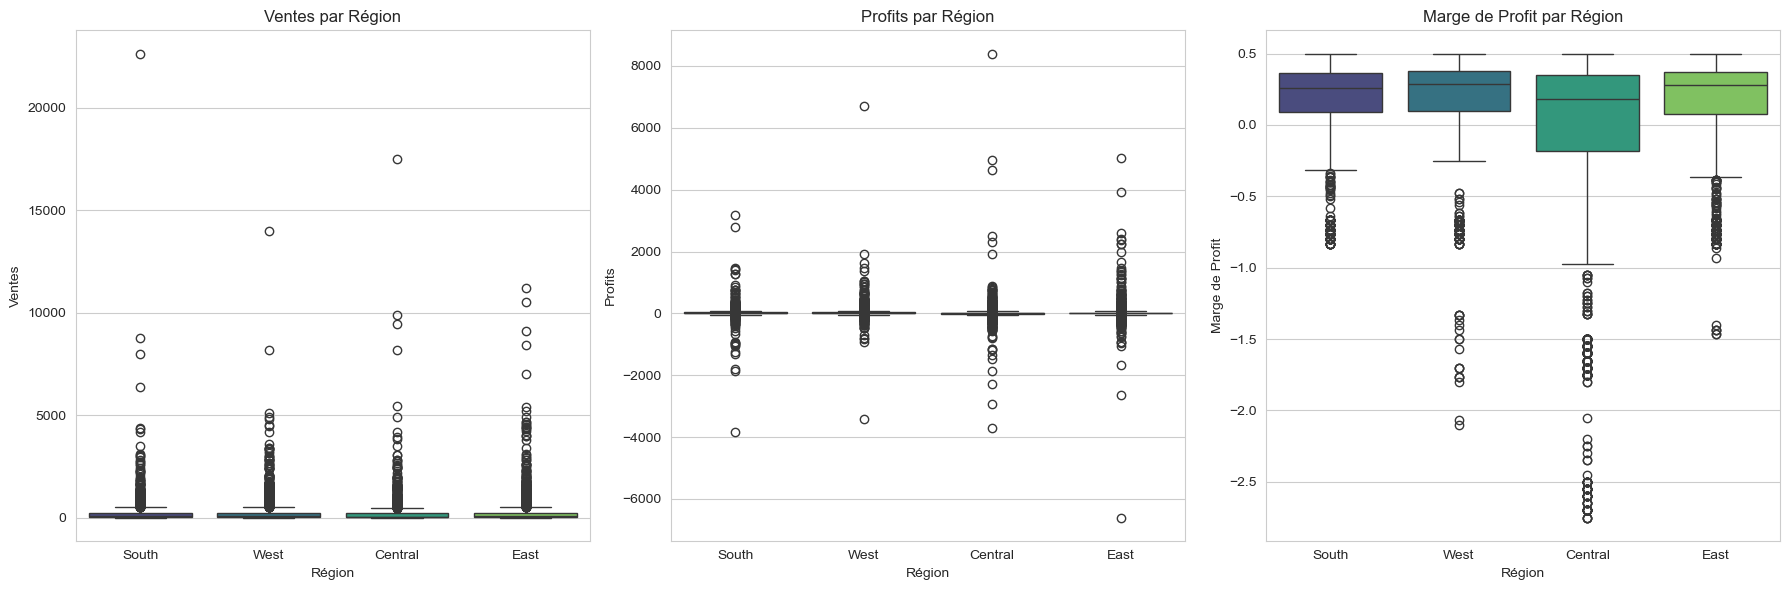


Visualisation : Performance par Segment Client


C:\Users\user\AppData\Local\Temp\ipykernel_12940\3593733674.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=df, x='Segment', y='Sales', palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_12940\3593733674.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df, x='Segment', y='Profit', palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_12940\3593733674.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], data=df, x='Segment', y='Profit Margin', palette='viridis')


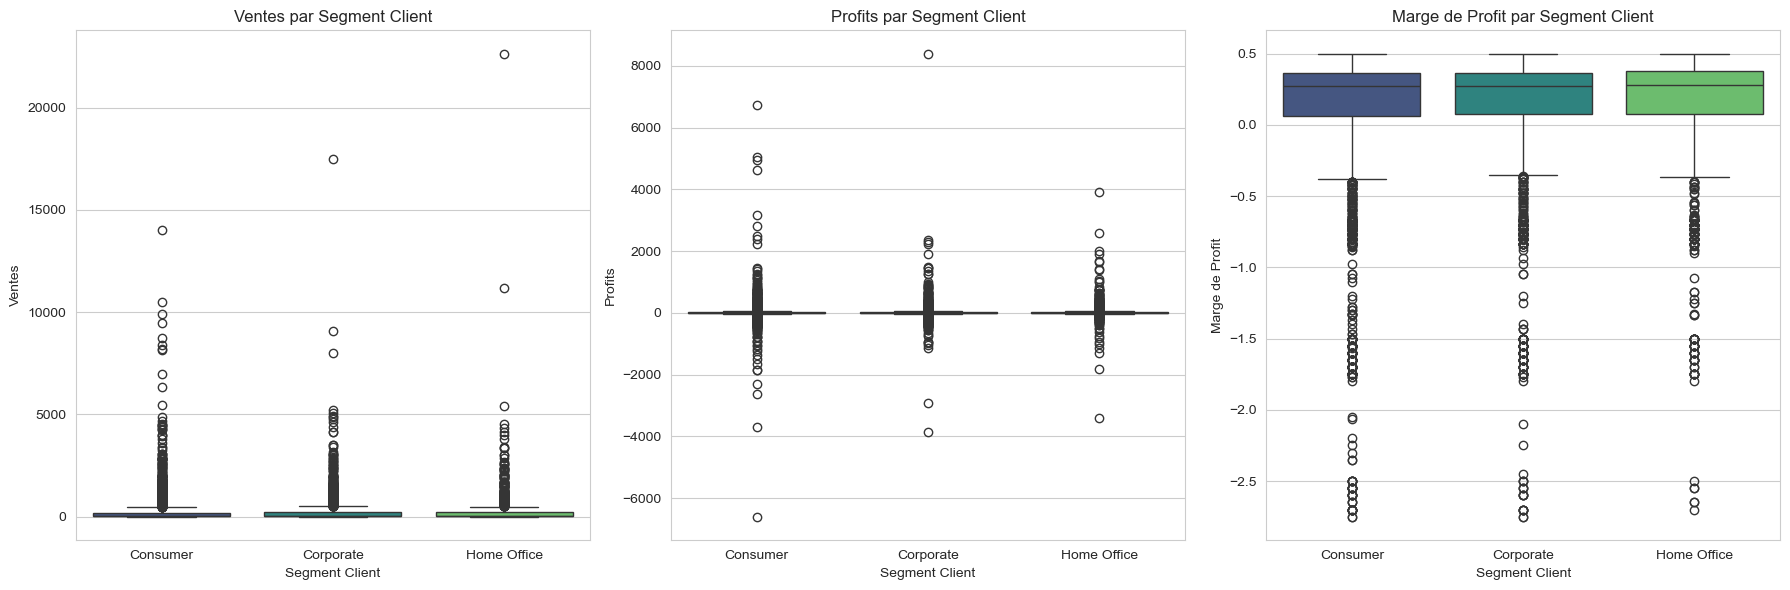

In [7]:
# --- Relation Quali-Quanti : Performance par Région ---

print("\nVisualisation : Performance par Région")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], data=df, x='Region', y='Sales', palette='viridis')
axes[0].set_title('Ventes par Région')
axes[0].set_xlabel('Région')
axes[0].set_ylabel('Ventes')

sns.boxplot(ax=axes[1], data=df, x='Region', y='Profit', palette='viridis')
axes[1].set_title('Profits par Région')
axes[1].set_xlabel('Région')
axes[1].set_ylabel('Profits')

sns.boxplot(ax=axes[2], data=df, x='Region', y='Profit Margin', palette='viridis')
axes[2].set_title('Marge de Profit par Région')
axes[2].set_xlabel('Région')
axes[2].set_ylabel('Marge de Profit')

plt.tight_layout()
plt.show()

# --- Relation Quali-Quanti : Performance par Segment Client ---

print("\nVisualisation : Performance par Segment Client")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(ax=axes[0], data=df, x='Segment', y='Sales', palette='viridis')
axes[0].set_title('Ventes par Segment Client')
axes[0].set_xlabel('Segment Client')
axes[0].set_ylabel('Ventes')

sns.boxplot(ax=axes[1], data=df, x='Segment', y='Profit', palette='viridis')
axes[1].set_title('Profits par Segment Client')
axes[1].set_xlabel('Segment Client')
axes[1].set_ylabel('Profits')

sns.boxplot(ax=axes[2], data=df, x='Segment', y='Profit Margin', palette='viridis')
axes[2].set_title('Marge de Profit par Segment Client')
axes[2].set_xlabel('Segment Client')
axes[2].set_ylabel('Marge de Profit')

plt.tight_layout()
plt.show()


Visualisation : Relation entre Ventes et Profits


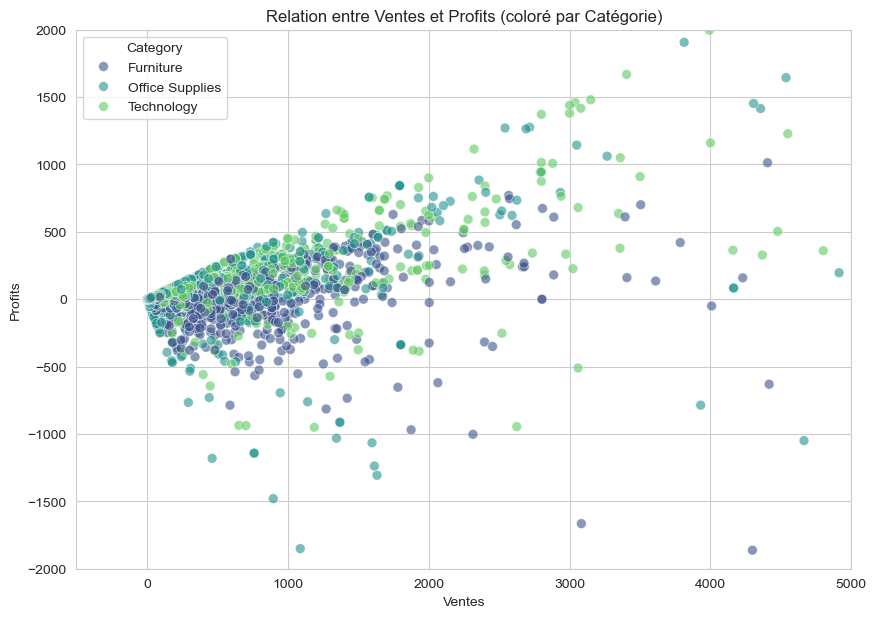


Visualisation : Impact de la Remise sur le Profit


C:\Users\user\AppData\Local\Temp\ipykernel_12940\227203445.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df.sort_values('Discount'), x='Discount', y='Profit', palette='viridis')


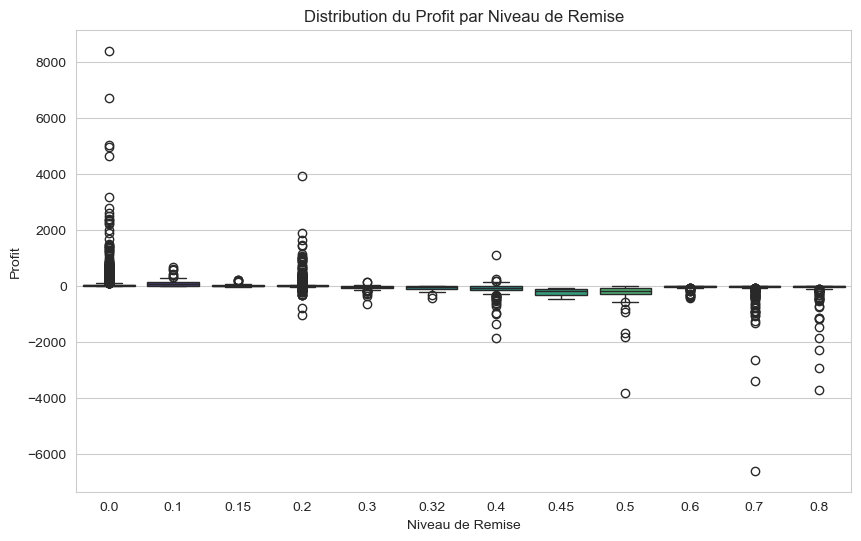


Visualisation : Tendances des Ventes et Profits par Année


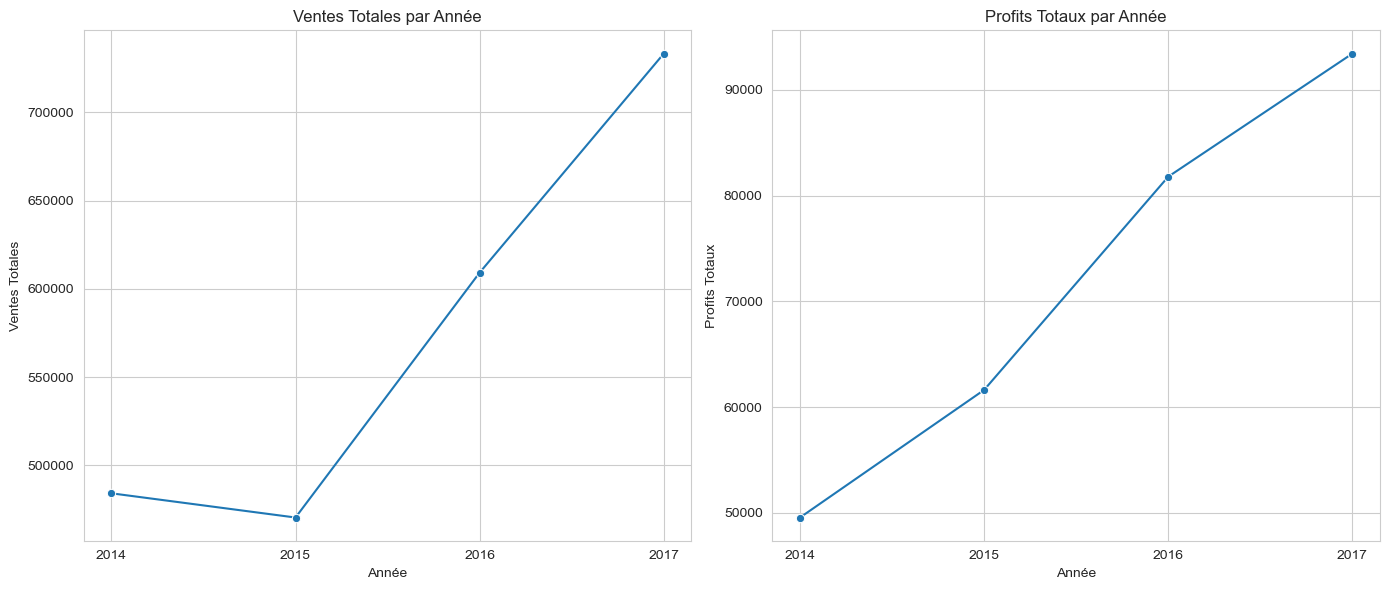


Visualisation : Tendances Mensuelles des Ventes et Profits (agrégées sur toutes les années)


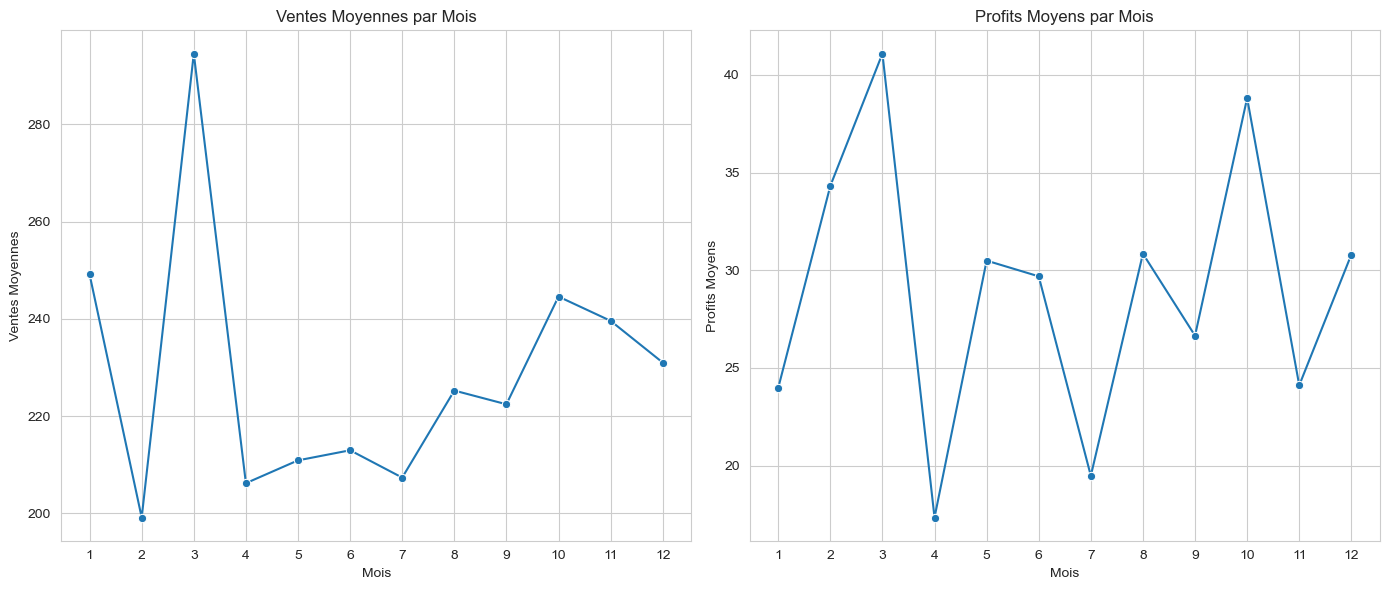


Visualisation : Ventes et Profits au fil du temps (par mois)


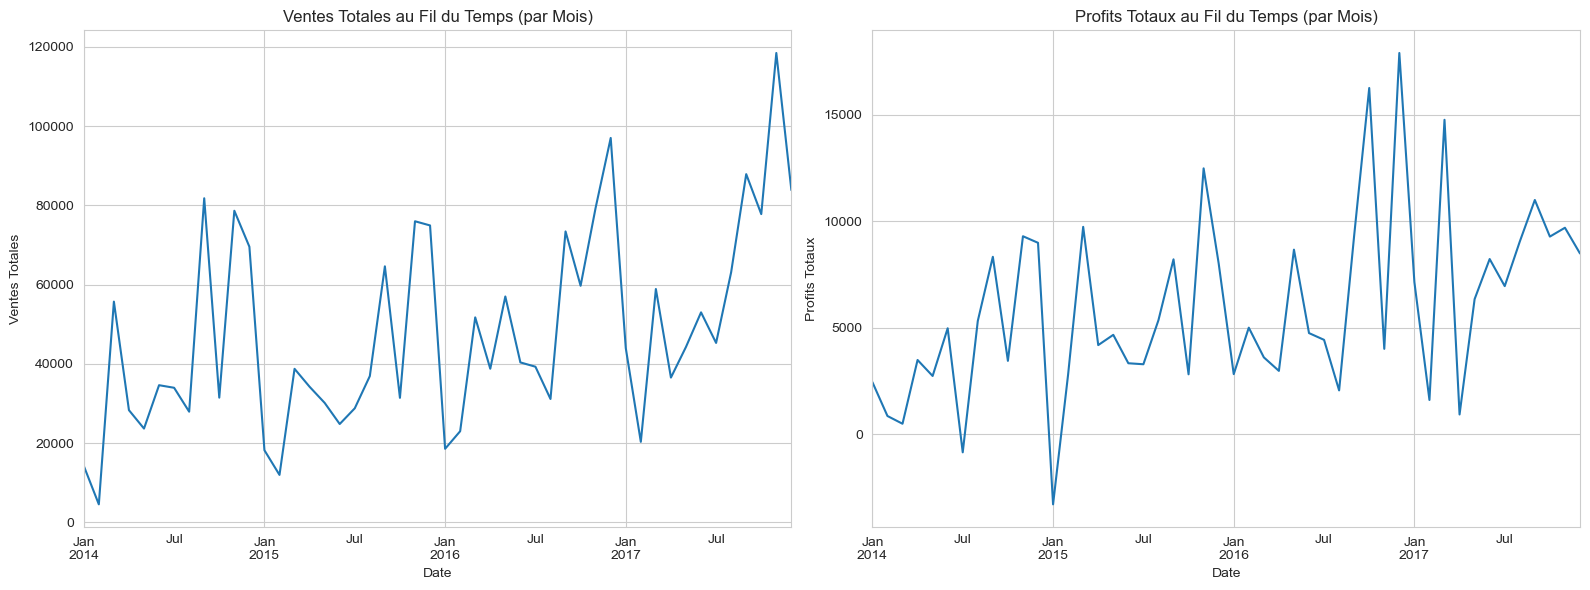

In [9]:
# --- Relation Quanti-Quanti : Profit vs Ventes ---
# Un scatter plot est utile pour voir la relation entre deux variables numériques.

print("\nVisualisation : Relation entre Ventes et Profits")
plt.figure(figsize=(10, 7))
# Ajouter 'hue' par catégorie peut révéler si certaines catégories ont des relations Ventex-Profit différentes
sns.scatterplot(data=df, x='Sales', y='Profit', alpha=0.6, hue='Category', palette='viridis', s=50) # s ajuste la taille des points
plt.title('Relation entre Ventes et Profits (coloré par Catégorie)')
plt.xlabel('Ventes')
plt.ylabel('Profits')
# Limiter les axes pour mieux voir la masse des points, car il y a de grosses outliers
plt.ylim(-2000, 2000)
plt.xlim(-500, 5000) # Adapter les limites si nécessaire après avoir vu le graphique initial
plt.show()


# --- Relation Quanti-Quanti : Impact de la Remise sur le Profit ---
# La remise est numérique mais prend un nombre limité de valeurs. Un box plot ou un scatter plot est possible.
# Le box plot par niveau de remise est souvent très parlant.

print("\nVisualisation : Impact de la Remise sur le Profit")
plt.figure(figsize=(10, 6))
# Triez par remise pour une meilleure lisibilité
sns.boxplot(data=df.sort_values('Discount'), x='Discount', y='Profit', palette='viridis')
plt.title('Distribution du Profit par Niveau de Remise')
plt.xlabel('Niveau de Remise')
plt.ylabel('Profit')
plt.show()


# --- Analyse Temporelle : Tendances des Ventes et Profits par Année et Mois ---
# Nous avons créé les colonnes 'Order Year' et 'Order Month'.
# Agrégeons les données par période (Année, puis Mois) et sommons Ventes et Profits.

print("\nVisualisation : Tendances des Ventes et Profits par Année")
# Agréger par Année
yearly_trends = df.groupby('Order Year')[['Sales', 'Profit']].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(ax=axes[0], data=yearly_trends, x='Order Year', y='Sales', marker='o')
axes[0].set_title('Ventes Totales par Année')
axes[0].set_xlabel('Année')
axes[0].set_ylabel('Ventes Totales')
axes[0].set_xticks(yearly_trends['Order Year']) # S'assurer que toutes les années sont affichées

sns.lineplot(ax=axes[1], data=yearly_trends, x='Order Year', y='Profit', marker='o')
axes[1].set_title('Profits Totaux par Année')
axes[1].set_xlabel('Année')
axes[1].set_ylabel('Profits Totaux')
axes[1].set_xticks(yearly_trends['Order Year']) # S'assurer que toutes les années sont affichées

plt.tight_layout()
plt.show()

print("\nVisualisation : Tendances Mensuelles des Ventes et Profits (agrégées sur toutes les années)")
# Agréger par Mois (en faisant la moyenne ou la somme sur toutes les années pour voir une saisonnalité moyenne)
# Utilisons la moyenne pour une meilleure comparaison entre mois si les années ont un nombre de données différent
monthly_avg_trends = df.groupby('Order Month')[['Sales', 'Profit']].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(ax=axes[0], data=monthly_avg_trends, x='Order Month', y='Sales', marker='o')
axes[0].set_title('Ventes Moyennes par Mois')
axes[0].set_xlabel('Mois')
axes[0].set_ylabel('Ventes Moyennes')
axes[0].set_xticks(range(1, 13)) # Afficher tous les mois (1 à 12)

sns.lineplot(ax=axes[1], data=monthly_avg_trends, x='Order Month', y='Profit', marker='o')
axes[1].set_title('Profits Moyens par Mois')
axes[1].set_xlabel('Mois')
axes[1].set_ylabel('Profits Moyens')
axes[1].set_xticks(range(1, 13)) # Afficher tous les mois (1 à 12)

plt.tight_layout()
plt.show()

# Analyse Temporelle : Ventes et Profits agrégés par Mois *au fil du temps* (comme dans la proposition initiale)
# Ceci montre la tendance globale et la saisonnalité combinées
print("\nVisualisation : Ventes et Profits au fil du temps (par mois)")
monthly_total_trends = df.set_index('Order Date').resample('MS')[['Sales', 'Profit']].sum() # 'MS' pour début de mois

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

monthly_total_trends['Sales'].plot(ax=axes[0])
axes[0].set_title('Ventes Totales au Fil du Temps (par Mois)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Ventes Totales')

monthly_total_trends['Profit'].plot(ax=axes[1])
axes[1].set_title('Profits Totaux au Fil du Temps (par Mois)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Profits Totaux')

plt.tight_layout()
plt.show()


Visualisation : Répartition des Segments Clients par Région
Tableau croisé : Région vs Segment Client


Segment,Consumer,Corporate,Home Office
Region,,,
Central,1212,673,438
East,1469,877,502
South,838,510,272
West,1672,960,571



Tableau croisé normalisé (pourcentage de Segments PAR Région)


Segment,Consumer,Corporate,Home Office
Region,,,
Central,0.52,0.29,0.19
East,0.52,0.31,0.18
South,0.52,0.31,0.17
West,0.52,0.30,0.18


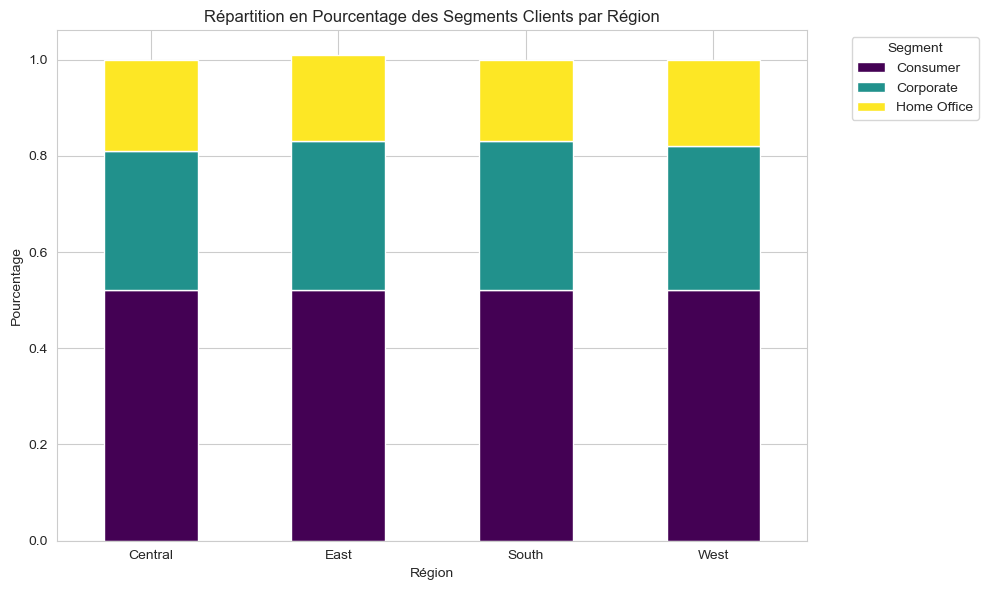

In [13]:
# --- Relation Quali-Quali : Exemple avec Region et Segment ---
# Un tableau croisé normalisé ou un stacked bar plot peut montrer la répartition d'une catégorie dans une autre.

print("\nVisualisation : Répartition des Segments Clients par Région")
# Tableau croisé des comptes
region_segment_crosstab = pd.crosstab(df['Region'], df['Segment'])
print("Tableau croisé : Région vs Segment Client")
display(region_segment_crosstab)

# Tableau croisé normalisé par index (pourcentages des segments PAR région)
region_segment_crosstab_norm = pd.crosstab(df['Region'], df['Segment'], normalize='index').round(2)
print("\nTableau croisé normalisé (pourcentage de Segments PAR Région)")
display(region_segment_crosstab_norm)

# Visualisation (stacked bar plot)
region_segment_crosstab_norm.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Répartition en Pourcentage des Segments Clients par Région')
plt.xlabel('Région')
plt.ylabel('Pourcentage')
plt.xticks(rotation=0)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left') # Déplacer la légende
plt.tight_layout()
plt.show()

Calcul des métriques RFM (Récence, Fréquence, Monétaire) pour chaque client...
Date de référence pour la Récence : 2017-12-31 00:00:00

--- Aperçu du DataFrame RFM par client ---


,Customer ID,Recency,Frequency,Monetary
0,AA-10315,185,11,5563.560
1,AA-10375,20,15,1056.390
2,AA-10480,260,12,1790.512
3,AA-10645,56,18,5086.935
4,AB-10015,416,6,886.156



--- Statistiques descriptives des métriques RFM ---


,Recency,Frequency,Monetary
count,793.000000,793.000000,793.000000
mean,147.802018,12.602774,2896.848500
std,186.211051,6.242559,2628.670117
min,1.000000,1.000000,4.833000
25%,31.000000,8.000000,1146.050000
50%,76.000000,12.000000,2256.394000
75%,184.000000,16.000000,3785.276000
max,1166.000000,37.000000,25043.050000



Visualisation des distributions des métriques RFM :


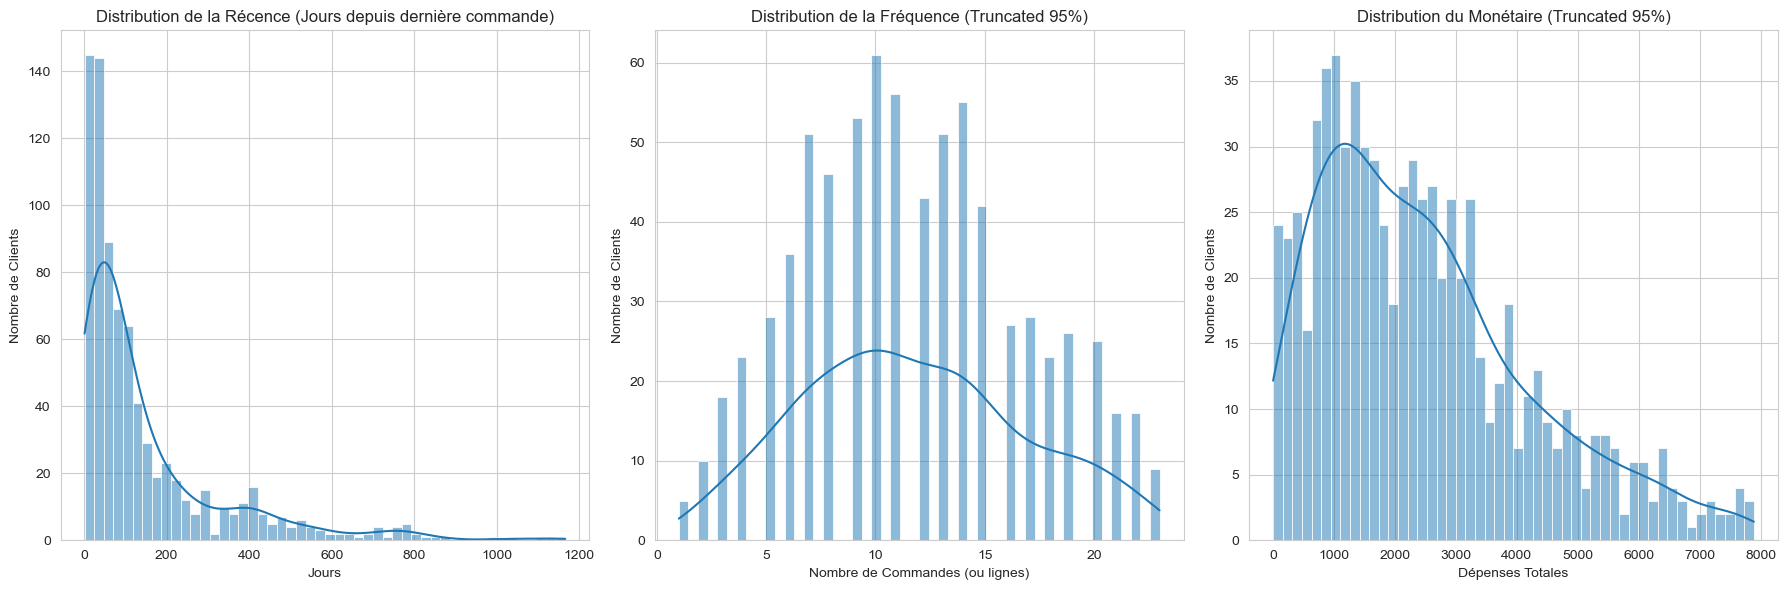


Clients avec la Récence la plus faible (les plus récents) :


,Customer ID,Recency,Frequency,Monetary
132,CC-12430,1,19,2870.050
603,PO-18865,1,13,2493.214
251,EB-13975,1,6,1643.255
392,JM-15580,1,7,303.948
429,KH-16360,2,14,3100.612



Clients avec la Fréquence la plus élevée :


,Customer ID,Recency,Frequency,Monetary
787,WB-21850,21,37,6160.102
606,PP-18955,98,34,7252.608
387,JL-15835,22,34,9799.923
482,MA-17560,65,34,4299.161
720,SV-20365,102,32,11470.950



Clients avec le Monétaire le plus élevé :


,Customer ID,Recency,Frequency,Monetary
700,SM-20320,80,15,25043.050
741,TC-20980,400,12,19052.218
621,RB-19360,97,18,15117.339
730,TA-21385,70,10,14595.620
6,AB-10105,42,20,14473.571


In [11]:
# --- Étape 2.1 : Calcul des Métriques RFM ---

print("Calcul des métriques RFM (Récence, Fréquence, Monétaire) pour chaque client...")

# Pour calculer la Récence, nous avons besoin d'une date de référence.
# La date de référence la plus logique est le jour juste après la dernière commande dans le dataset.
# Cela simule le moment où l'analyse serait effectuée.
recent_date = df['Order Date'].max() + pd.Timedelta(days=1)
print(f"Date de référence pour la Récence : {recent_date}")

# Agréger les données au niveau du client (Customer ID) pour calculer RFM
# On utilise .agg() pour appliquer différentes fonctions d'agrégation à différentes colonnes
rfm_df = df.groupby('Customer ID').agg(
    # Récence : Calculer la différence en jours entre la date de référence et la date de la dernière commande du client
    Recency=('Order Date', lambda date: (recent_date - date.max()).days),
    # Fréquence : Compter le nombre de commandes du client.
    # Dans ce dataset, chaque ligne est une ligne de commande, pas une commande unique.
    # Pour une fréquence plus précise par commande, il faudrait compter les Order ID uniques par client.
    # Simplifions pour l'instant en comptant le nombre de lignes (qui est corrélé à la fréquence).
    # Pour un projet plus avancé, compter len(date.unique()) si 'Order ID' était dans l'agg par date,
    # ou compter Order ID uniques dans le df groupé par Customer ID avant l'agg.
    # Restons sur le comptage des lignes pour ce niveau.
    Frequency=('Order ID', 'count'), # Compte simplement le nombre de lignes pour chaque client

    # Monétaire : Faire la somme des ventes pour chaque client
    Monetary=('Sales', 'sum')
).reset_index() # reset_index() transforme l'index 'Customer ID' en colonne normale

print("\n--- Aperçu du DataFrame RFM par client ---")
display(rfm_df.head())

print("\n--- Statistiques descriptives des métriques RFM ---")
display(rfm_df[['Recency', 'Frequency', 'Monetary']].describe())

# --- Visualiser la distribution des métriques RFM ---
# Les distributions RFM sont généralement très asymétriques, avec beaucoup de clients à faible Récence, Fréquence, Monétaire,
# et quelques clients à valeurs très élevées.

print("\nVisualisation des distributions des métriques RFM :")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(ax=axes[0], data=rfm_df, x='Recency', bins=50, kde=True)
axes[0].set_title('Distribution de la Récence (Jours depuis dernière commande)')
axes[0].set_xlabel('Jours')
axes[0].set_ylabel('Nombre de Clients')

# Pour la Fréquence et le Monétaire, les valeurs élevées peuvent écraser le graphique.
# On peut limiter l'axe x pour mieux voir la majorité des données ou utiliser une échelle log (on fera log plus tard pour KMeans).
sns.histplot(ax=axes[1], data=rfm_df[rfm_df['Frequency'] < rfm_df['Frequency'].quantile(0.95)], x='Frequency', bins=50, kde=True) # Limiter aux 95% inférieurs
axes[1].set_title('Distribution de la Fréquence (Truncated 95%)')
axes[1].set_xlabel('Nombre de Commandes (ou lignes)')
axes[1].set_ylabel('Nombre de Clients')

sns.histplot(ax=axes[2], data=rfm_df[rfm_df['Monetary'] < rfm_df['Monetary'].quantile(0.95)], x='Monetary', bins=50, kde=True) # Limiter aux 95% inférieurs
axes[2].set_title('Distribution du Monétaire (Truncated 95%)')
axes[2].set_xlabel('Dépenses Totales')
axes[2].set_ylabel('Nombre de Clients')

plt.tight_layout()
plt.show()

# Afficher les clients avec les valeurs RFM les plus élevées (pour voir les outliers)
print("\nClients avec la Récence la plus faible (les plus récents) :")
display(rfm_df.sort_values('Recency', ascending=True).head())

print("\nClients avec la Fréquence la plus élevée :")
display(rfm_df.sort_values('Frequency', ascending=False).head())

print("\nClients avec le Monétaire le plus élevé :")
display(rfm_df.sort_values('Monetary', ascending=False).head())

Préparation des données RFM (Transformation et Standardisation)...

Visualisation des distributions RFM après transformation log(1+x) :


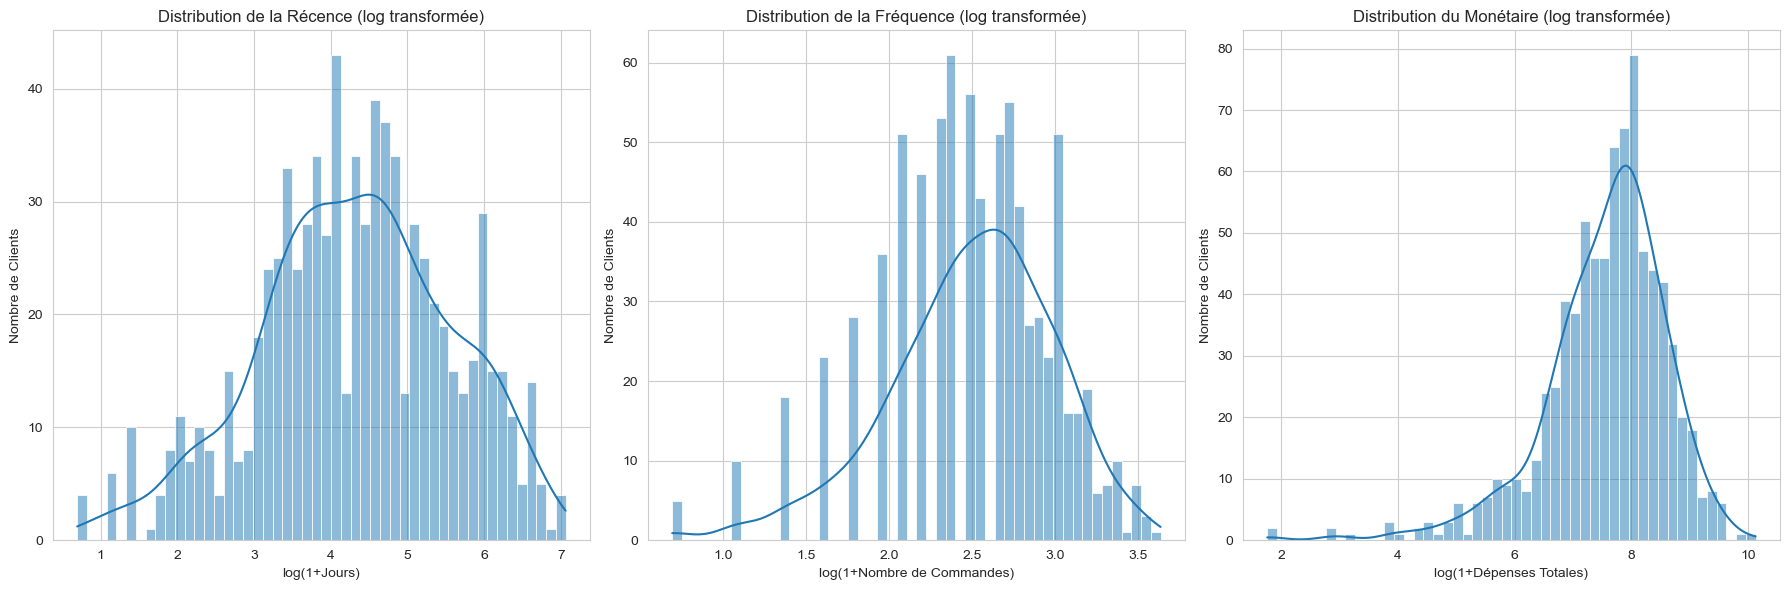


--- Aperçu des données RFM après transformation et standardisation ---


,Recency_Scaled,Frequency_Scaled,Monetary_Scaled,Customer ID
0,0.728424,-0.023140,1.013567,AA-10315
1,-1.003118,0.550700,-0.568377,AA-10375
2,0.997357,0.136521,-0.066099,AA-10480
3,-0.210446,0.893490,0.928264,AA-10645
4,1.369323,-1.098277,-0.735599,AB-10015



--- Statistiques descriptives des données RFM standardisées ---


,Recency_Scaled,Frequency_Scaled,Monetary_Scaled
count,7.930000e+02,7.930000e+02,7.930000e+02
mean,6.182528e-16,-5.891322e-16,3.337669e-16
std,1.000631e+00,1.000631e+00,1.000631e+00
min,-2.869733e+00,-3.597166e+00,-5.522058e+00
25%,-6.687421e-01,-5.969800e-01,-4.908427e-01
50%,2.830443e-02,1.365211e-01,1.541018e-01
75%,7.241450e-01,6.716277e-01,6.467732e-01
max,2.186268e+00,2.276111e+00,2.446525e+00


Préparation des données terminée. Les données sont prêtes pour le clustering KMeans.


In [13]:
# --- Étape 2.2 : Préparation des Données RFM pour le Clustering ---

print("Préparation des données RFM (Transformation et Standardisation)...")

# --- 1. Transformation pour réduire l'asymétrie ---
# Les distributions de Recency, Frequency et Monetary sont souvent très asymétriques.
# Une transformation logarithmique (log) est courante pour les rendre plus symétriques.
# Nous utilisons np.log1p(x) qui calcule log(1+x). C'est utile si certaines valeurs sont 0,
# car log(0) n'est pas défini, tandis que log(1+0) = log(1) = 0.
# Recency peut être 0 si la dernière commande est le jour de référence, donc log1p est sûr.

rfm_transformed = rfm_df[['Recency', 'Frequency', 'Monetary']].copy()
rfm_transformed['Recency'] = np.log1p(rfm_transformed['Recency'])
rfm_transformed['Frequency'] = np.log1p(rfm_transformed['Frequency'])
rfm_transformed['Monetary'] = np.log1p(rfm_transformed['Monetary'])

print("\nVisualisation des distributions RFM après transformation log(1+x) :")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(ax=axes[0], data=rfm_transformed, x='Recency', bins=50, kde=True)
axes[0].set_title('Distribution de la Récence (log transformée)')
axes[0].set_xlabel('log(1+Jours)')
axes[0].set_ylabel('Nombre de Clients')

sns.histplot(ax=axes[1], data=rfm_transformed, x='Frequency', bins=50, kde=True)
axes[1].set_title('Distribution de la Fréquence (log transformée)')
axes[1].set_xlabel('log(1+Nombre de Commandes)')
axes[1].set_ylabel('Nombre de Clients')

sns.histplot(ax=axes[2], data=rfm_transformed, x='Monetary', bins=50, kde=True)
axes[2].set_title('Distribution du Monétaire (log transformée)')
axes[2].set_xlabel('log(1+Dépenses Totales)')
axes[2].set_ylabel('Nombre de Clients')

plt.tight_layout()
plt.show()


from sklearn.preprocessing import StandardScaler

# --- 2. Standardisation des données transformées ---
# StandardScaler ajuste les valeurs de chaque variable pour qu'elles aient une moyenne de 0
# et un écart-type de 1. Cela met toutes les métriques RFM sur une échelle comparable.

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_transformed) # fit_transform calcule les moyennes/écarts types et applique la transformation

# Convertir le résultat (qui est un array numpy) en DataFrame pandas pour la clarté
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled'])

# Ajouter l'ID client au DataFrame standardisé pour référence future
rfm_scaled_df['Customer ID'] = rfm_df['Customer ID']

print("\n--- Aperçu des données RFM après transformation et standardisation ---")
display(rfm_scaled_df.head())

print("\n--- Statistiques descriptives des données RFM standardisées ---")
display(rfm_scaled_df[['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled']].describe())

print("Préparation des données terminée. Les données sont prêtes pour le clustering KMeans.")

Détermination du nombre optimal de clusters (K) avec la Méthode du Coude...


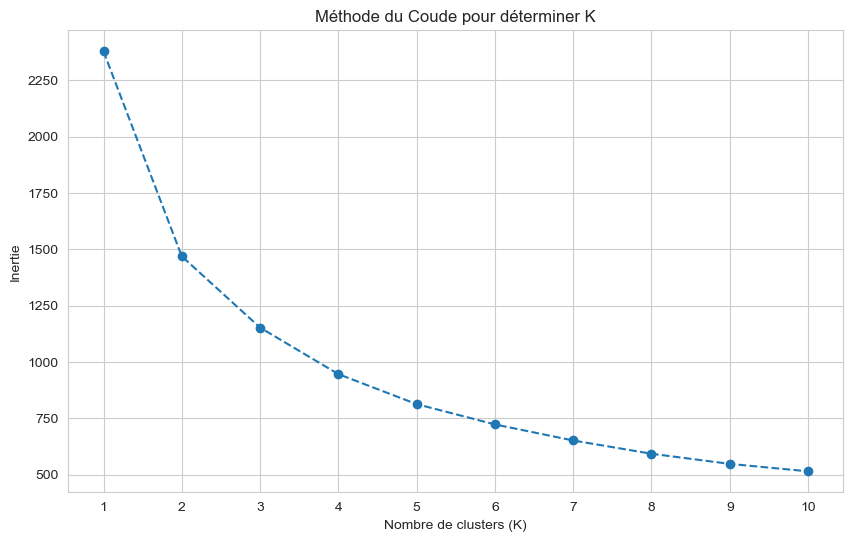

Méthode du Coude terminée. Regardez le graphique pour choisir K.


In [15]:
# --- Étape 2.3.1 : Détermination de K avec la Méthode du Coude ---

# Importer l'algorithme KMeans
from sklearn.cluster import KMeans

print("Détermination du nombre optimal de clusters (K) avec la Méthode du Coude...")

# Nous allons exécuter KMeans pour K allant de 1 à 10 et enregistrer l'inertie
sse = {} # Dictionnaire pour stocker la somme des carrés intra-cluster (Inertie) pour chaque K

# Nous utilisons les données RFM standardisées pour le clustering
data_for_kmeans = rfm_scaled_df[['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled']]

for k in range(1, 11): # Tester K de 1 à 10
    # Initialiser KMeans
    # n_clusters: le nombre de clusters (K)
    # random_state: pour la reproductibilité des résultats
    # n_init: nombre de fois où l'algorithme est exécuté avec différents centroïdes initiaux.
    # Le résultat final est la meilleure exécution en termes d'inertie. Recommandé > 1.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Entraîner le modèle KMeans sur les données standardisées
    kmeans.fit(data_for_kmeans)

    # Enregistrer l'inertie pour ce K
    sse[k] = kmeans.inertia_

# Visualiser la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o', linestyle='--')
plt.title('Méthode du Coude pour déterminer K')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.xticks(range(1, 11)) # S'assurer que tous les K testés sont affichés sur l'axe des x
plt.grid(True)
plt.show()

print("Méthode du Coude terminée. Regardez le graphique pour choisir K.")

In [17]:
# --- Étape 2.3.2 : Application de l'Algorithme KMeans ---

print(f"Application de l'algorithme KMeans avec K = 2...")

# Choisir le nombre de clusters basé sur la méthode du coude (votre choix)
K_CHOISI = 2

# Initialiser et entraîner le modèle KMeans
# Nous utilisons toujours les données standardisées pour l'entraînement
kmeans = KMeans(n_clusters=K_CHOISI, random_state=42, n_init=10) # n_init=10 est important
kmeans.fit(data_for_kmeans) # data_for_kmeans contient les données RFM standardisées/transformées

# Récupérer les labels de cluster assignés à chaque client
# Ces labels sont dans l'ordre des lignes du DataFrame data_for_kmeans (et donc de rfm_df)
cluster_labels = kmeans.labels_

# Ajouter les labels de cluster au DataFrame RFM original (rfm_df)
rfm_df['Cluster'] = cluster_labels

# Afficher les premières lignes du DataFrame RFM avec le nouveau label de cluster
print(f"\n--- Aperçu du DataFrame RFM avec les labels de cluster (K={K_CHOISI}) ---")
display(rfm_df.head())

# Vérifier la taille de chaque cluster (nombre de clients par cluster)
print(f"\n--- Taille de chaque cluster (nombre de clients) pour K={K_CHOISI} ---")
display(rfm_df['Cluster'].value_counts())

print(f"Application de KMeans terminée. Les clients sont assignés à l'un des {K_CHOISI} clusters (0 ou 1).")

Application de l'algorithme KMeans avec K = 2...

--- Aperçu du DataFrame RFM avec les labels de cluster (K=2) ---


,Customer ID,Recency,Frequency,Monetary,Cluster
0,AA-10315,185,11,5563.560,1
1,AA-10375,20,15,1056.390,1
2,AA-10480,260,12,1790.512,1
3,AA-10645,56,18,5086.935,1
4,AB-10015,416,6,886.156,0



--- Taille de chaque cluster (nombre de clients) pour K=2 ---


Cluster
1    527
0    266
Name: count, dtype: int64

Application de KMeans terminée. Les clients sont assignés à l'un des 2 clusters (0 ou 1).


Analyse des caractéristiques de chaque cluster client...
Colonne 'Cluster' ajoutée à rfm_scaled_df.

--- Métriques RFM moyennes (non standardisées) par cluster ---


,0,1
Cluster,0.000000,1.000000
Recency,261.112782,90.609108
Frequency,6.879699,15.491461
Monetary,1034.486301,3836.864334


C:\Users\user\AppData\Local\Temp\ipykernel_12940\2910210029.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=cluster_rfm_means, x='Cluster', y='Recency', palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_12940\2910210029.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=cluster_rfm_means, x='Cluster', y='Frequency', palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_12940\2910210029.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], data=cluster_rfm_means, x='Clust

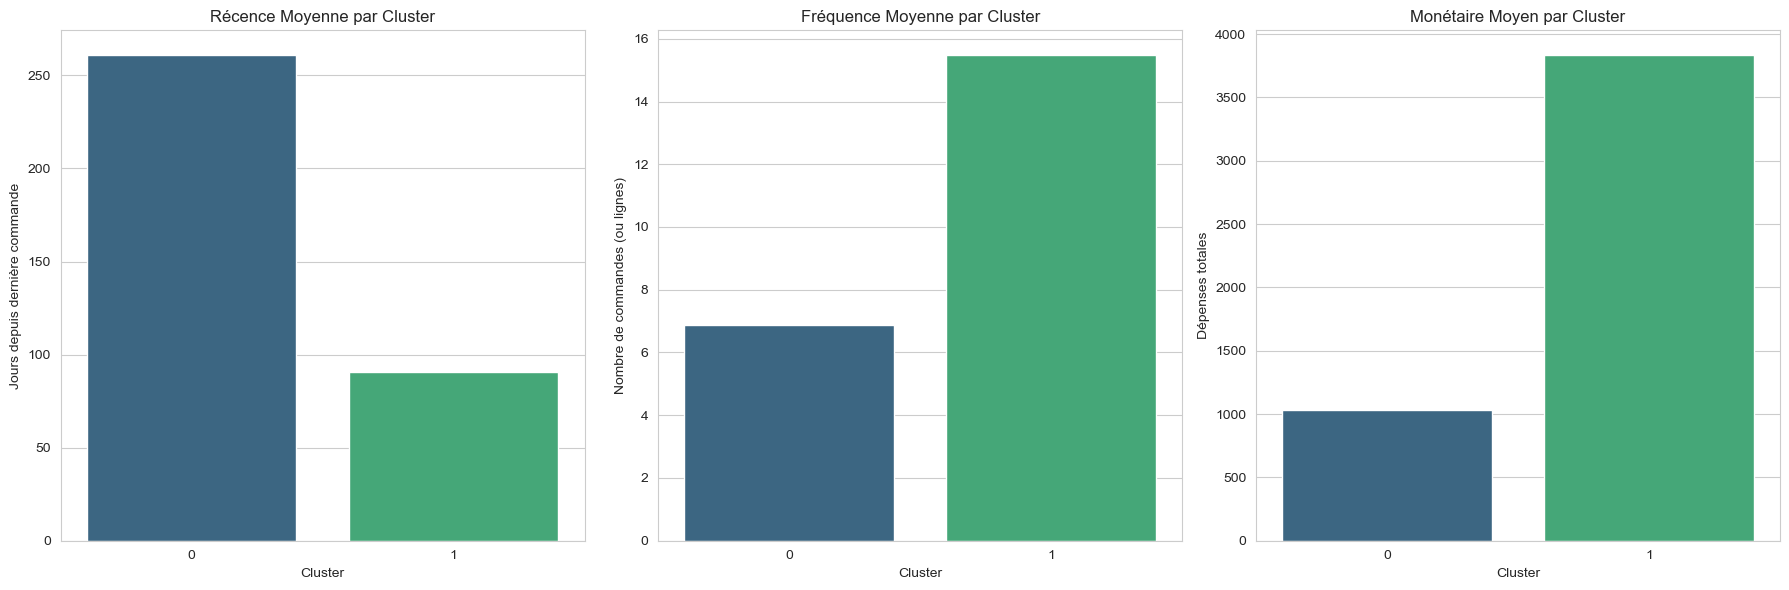


--- Métriques RFM moyennes (standardisées) par cluster ---


,0,1
Cluster,0.000000,1.000000
Recency_Scaled,0.613739,-0.309781
Frequency_Scaled,-1.008676,0.509123
Monetary_Scaled,-0.937955,0.473427


C:\Users\user\AppData\Local\Temp\ipykernel_12940\2910210029.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=cluster_rfm_scaled_means, x='Cluster', y='Recency_Scaled', palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_12940\2910210029.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=cluster_rfm_scaled_means, x='Cluster', y='Frequency_Scaled', palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_12940\2910210029.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], data

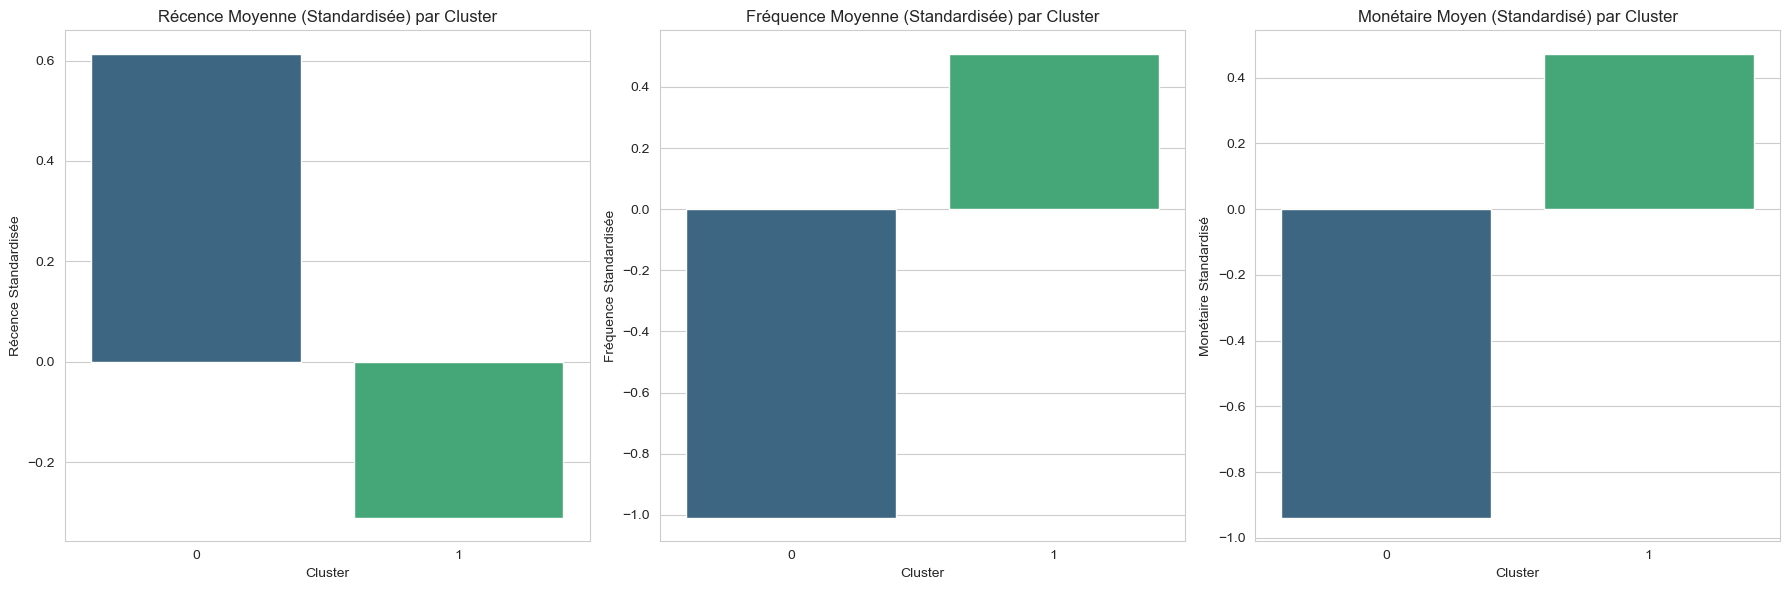


Aperçu du DataFrame original avec la colonne Cluster ajoutée :


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day of Week,Order Day Name,Profit Margin,Cluster
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,2016,11,1,Tuesday,0.1600,0
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,2016,11,1,Tuesday,0.3000,0
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,2016,6,6,Sunday,0.4700,1
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,2015,10,6,Sunday,-0.4000,1
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,2015,10,6,Sunday,0.1125,1



--- Répartition des Segments Clients par Cluster ---


Segment,Consumer,Corporate,Home Office
Cluster,,,
0,0.51,0.28,0.21
1,0.52,0.31,0.17



--- Répartition des Régions par Cluster ---


Region,Central,East,South,West
Cluster,,,,
0,0.23,0.30,0.17,0.30
1,0.23,0.28,0.16,0.32



--- Répartition des Catégories de Produits dans les transactions par Cluster ---


Category,Furniture,Office Supplies,Technology
Cluster,,,
0,0.20,0.64,0.16
1,0.22,0.59,0.19



--- Interprétation des Clusters et Stratégies Potentielles ---

Analyse des clusters terminée. Interprétez les résultats ci-dessus pour caractériser vos 2 segments.


In [ ]:
# --- Étape 2.4 : Analyse et Caractérisation des Clusters (Corrigé) ---

print("Analyse des caractéristiques de chaque cluster client...")

# Assurez-vous que la colonne 'Cluster' est présente dans le DataFrame standardisé aussi
# Elle a été ajoutée à rfm_df à l'étape précédente, copions-la dans rfm_scaled_df
rfm_scaled_df['Cluster'] = rfm_df['Cluster']
print("Colonne 'Cluster' ajoutée à rfm_scaled_df.")


# --- 1. Analyser les métriques RFM moyennes par cluster ---
# Regrouper le DataFrame RFM par le label de cluster et calculer la moyenne des métriques RFM originales (non standardisées)
# Ceci utilise bien rfm_df qui contient déjà la colonne Cluster
cluster_rfm_means = rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

print("\n--- Métriques RFM moyennes (non standardisées) par cluster ---")
# Il est utile de transposer le tableau pour comparer plus facilement les clusters côte à côte
display(cluster_rfm_means.T)

# Visualiser les moyennes RFM par cluster (souvent avec un bar plot)
# Pour une meilleure comparaison, on peut normaliser ces moyennes ou juste les tracer.
# Tracons les moyennes brutes et standardisées.

# Moyennes des métriques RFM *originales* (non standardisées)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(ax=axes[0], data=cluster_rfm_means, x='Cluster', y='Recency', palette='viridis')
axes[0].set_title('Récence Moyenne par Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Jours depuis dernière commande')

sns.barplot(ax=axes[1], data=cluster_rfm_means, x='Cluster', y='Frequency', palette='viridis')
axes[1].set_title('Fréquence Moyenne par Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Nombre de commandes (ou lignes)')

sns.barplot(ax=axes[2], data=cluster_rfm_means, x='Cluster', y='Monetary', palette='viridis')
axes[2].set_title('Monétaire Moyen par Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Dépenses totales')

plt.tight_layout()
plt.show()


# Pour aider à l'interprétation, on peut aussi regarder les moyennes sur les données *standardisées*
# Ceci utilise maintenant rfm_scaled_df qui contient la colonne Cluster grâce à la correction
cluster_rfm_scaled_means = rfm_scaled_df.groupby('Cluster')[['Recency_Scaled', 'Frequency_Scaled', 'Monetary_Scaled']].mean().reset_index()
print("\n--- Métriques RFM moyennes (standardisées) par cluster ---")
display(cluster_rfm_scaled_means.T)

# Moyennes des métriques RFM standardisées
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Utilisez 'Recency_Scaled' au lieu de 'Recency'
sns.barplot(ax=axes[0], data=cluster_rfm_scaled_means, x='Cluster', y='Recency_Scaled', palette='viridis')
axes[0].set_title('Récence Moyenne (Standardisée) par Cluster') # Adaptez le titre
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Récence Standardisée') # Adaptez le label de l'axe y

# Utilisez 'Frequency_Scaled' au lieu de 'Frequency'
sns.barplot(ax=axes[1], data=cluster_rfm_scaled_means, x='Cluster', y='Frequency_Scaled', palette='viridis')
axes[1].set_title('Fréquence Moyenne (Standardisée) par Cluster') # Adaptez le titre
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Fréquence Standardisée') # Adaptez le label de l'axe y

# Utilisez 'Monetary_Scaled' au lieu de 'Monetary'
sns.barplot(ax=axes[2], data=cluster_rfm_scaled_means, x='Cluster', y='Monetary_Scaled', palette='viridis')
axes[2].set_title('Monétaire Moyen (Standardisé) par Cluster') # Adaptez le titre
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Monétaire Standardisé') # Adaptez le label de l'axe y

plt.tight_layout()
plt.show()


# --- 2. Analyser d'autres caractéristiques par cluster ---
# Pour analyser d'autres colonnes (Segment, Region, Category, etc.), il faut joindre les labels de cluster
# au DataFrame original 'df'. Les labels sont actuellement dans 'rfm_df' et 'rfm_scaled_df'.
# Nous joignons le cluster ID au DataFrame original en utilisant 'Customer ID'.

# Sélectionner les colonnes 'Customer ID' et 'Cluster' du DataFrame RFM
customer_clusters = rfm_df[['Customer ID', 'Cluster']] # On utilise rfm_df car on est sûr que le cluster y est

# Joindre ces informations au DataFrame original 'df'
# Chaque ligne de df aura maintenant le label de cluster du client correspondant
df_clustered = df.merge(customer_clusters, on='Customer ID', how='left')

print("\nAperçu du DataFrame original avec la colonne Cluster ajoutée :")
display(df_clustered.head())


# Analyser la répartition des clients par d'autres catégories (Segment, Region, etc.) au sein de chaque cluster
# Utilisez pd.crosstab ou value_counts(normalize=True)

print("\n--- Répartition des Segments Clients par Cluster ---")
# crosstab avec normalize='index' montre la proportion de chaque segment client *dans chaque cluster*
display(pd.crosstab(df_clustered['Cluster'], df_clustered['Segment'], normalize='index').round(2))


print("\n--- Répartition des Régions par Cluster ---")
# crosstab avec normalize='index' montre la proportion de chaque région *dans chaque cluster*
display(pd.crosstab(df_clustered['Cluster'], df_clustered['Region'], normalize='index').round(2))

# Vous pouvez répéter pour d'autres variables catégorielles pertinentes comme 'Ship Mode', 'Category' (des produits achetés par ce cluster)
# Pour 'Category', il faut regrouper dF_clustered par Cluster et Customer ID, puis regarder les catégories de produits achetés.
# Simplifions pour l'instant en regardant juste la proportion de catégories de produits *dans les transactions* de chaque cluster.

print("\n--- Répartition des Catégories de Produits dans les transactions par Cluster ---")
# crosstab avec normalize='index' montre la proportion de chaque catégorie *dans les transactions de chaque cluster*
display(pd.crosstab(df_clustered['Cluster'], df_clustered['Category'], normalize='index').round(2))


# --- 3. Nommer les Clusters et Proposer des Stratégies (Analyse Prescriptive) ---

# je laisse cette section ouverte pour que vous puissiez donner votre propre interprétation
# et vos recommandations stratégiques basées sur les résultats ci-dessus.

print("\n--- Interprétation des Clusters et Stratégies Potentielles ---")

# Basé sur les tableaux de moyennes RFM (cluster_rfm_means) et les répartitions par d'autres caractéristiques :
# Écrivez ici une description pour chaque cluster (0 et 1 dans votre cas).
# Exemple (adaptez ceci à vos résultats réels !) :
# - **Cluster 0 :**
#   - **Caractéristiques RFM :** Récence (élevée/faible?), Fréquence (élevée/faible?), Monétaire (élevé/faible?). Comparez avec l'autre cluster.
#   - **Autres caractéristiques :** Sont-ils majoritairement d'une certaine Région ? D'un certain Segment Client ? Achètent-ils plus un certain type de produits ?
#   - **Nom proposé :** Par exemple, "Clients Inactifs / Faible Valeur" si Récence est élevée, Fréquence et Monétaire faibles. Ou "Gros Clients Récents" si Récence faible, Fréquence et Monétaire élevés.
#   - **Stratégie potentielle :** Que faire pour ce groupe ? Réactiver ? Fidéliser ? Augmenter la valeur ?

# - **Cluster 1 :**
#   - **Caractéristiques RFM :** Récence (élevée/faible?), Fréquence (élevée/faible?), Monétaire (élevé/faible?). Comparez avec l'autre cluster.
#   - **Autres caractéristiques :** Répartition géographique, segment, etc.
#   - **Nom proposé :** Par exemple, "Clients Actifs / Forte Valeur" ou "Clients Promis".
#   - **Stratégie potentielle :** Comment les engager davantage ? Les récompenser ? Vente croisée ?

# Adaptez ces descriptions et stratégies en fonction des chiffres et proportions que vous voyez dans les outputs générés par le code ci-dessus.
# C'est l'étape la plus importante pour transformer l'analyse en insights business actionnables.

print("\nAnalyse des clusters terminée. Interprétez les résultats ci-dessus pour caractériser vos 2 segments.")